In [73]:
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings


In [74]:
data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv', sep=',', delimiter=None)
data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Not applicable to me,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,Yes,Very easy,...,Sometimes,Often,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,1.0,I don't know,No,No,No,I don't know,Very difficult,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


# #Exploratory

In [75]:
Mental_Health_ID_1 = data['Have you had a mental health disorder in the past?']
Mental_Health_ID_2 = data['Do you currently have a mental health disorder?']



In [76]:
pd.get_dummies(data).drop(['Are you self-employed?'], axis=1)

,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,How many employees does your company or organization have?_100-500,How many employees does your company or organization have?_25-Jun,How many employees does your company or organization have?_26-100,How many employees does your company or organization have?_5-Jan,...,Which of the following best describes your work position?_Support|DevOps/SysAdmin,Which of the following best describes your work position?_Support|Front-end Developer|Back-end Developer,Which of the following best describes your work position?_Support|Front-end Developer|Designer,Which of the following best describes your work position?_Support|HR|Supervisor/Team Lead|Executive Leadership,Which of the following best describes your work position?_Support|Other,Which of the following best describes your work position?_Support|Sales|Back-end Developer|Front-end Developer|Designer|One-person shop,Which of the following best describes your work position?_Support|Sales|Designer,Do you work remotely?_Always,Do you work remotely?_Never,Do you work remotely?_Sometimes
0,1.0,NaN,NaN,1,0,39,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,NaN,NaN,1,1,29,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,NaN,NaN,1,1,38,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NaN,NaN,1.0,1,1,43,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,NaN,1,1,43,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,NaN,NaN,1,1,42,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,NaN,NaN,1,0,30,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,NaN,NaN,1,1,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,NaN,1,1,44,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,NaN,NaN,1.0,1,1,30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
responses = set()
for response in Mental_Health_ID_1:
    if response not in responses:
        responses.add(response)

for response in Mental_Health_ID_2:
    if response not in responses:
        responses.add(response)
        
responses

{'Maybe', 'No', 'Yes'}

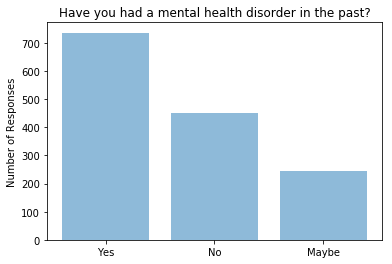

736
451
246
()
575
531
327


In [78]:
options = ('Yes', 'No', 'Maybe')
y_pos = np.arange(len(options))

numYes = list(Mental_Health_ID_1).count("Yes")
numNo = list(Mental_Health_ID_1).count("No")
numMaybe = list(Mental_Health_ID_1).count("Maybe")
performance = [numYes, numNo, numMaybe]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, options)
plt.ylabel('Number of Responses')
plt.title('Have you had a mental health disorder in the past?')
plt.show()


print(list(Mental_Health_ID_1).count("Yes"))
print(list(Mental_Health_ID_1).count("No"))
print(list(Mental_Health_ID_1).count("Maybe"))
print()
print(list(Mental_Health_ID_2).count("Yes"))
print(list(Mental_Health_ID_2).count("No"))
print(list(Mental_Health_ID_2).count("Maybe"))

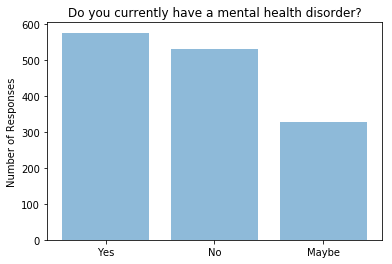

In [79]:
options = ('Yes', 'No', 'Maybe')
y_pos = np.arange(len(options))

numYes = list(Mental_Health_ID_2).count("Yes")
numNo = list(Mental_Health_ID_2).count("No")
numMaybe = list(Mental_Health_ID_2).count("Maybe")
performance = [numYes, numNo, numMaybe]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, options)
plt.ylabel('Number of Responses')
plt.title('Do you currently have a mental health disorder?')
plt.show()



[839, 594]


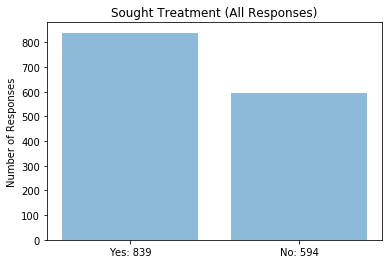

{0, 1}

In [89]:
response = 'Have you ever sought treatment for a mental health issue from a mental health professional?'

options = ("Yes: 839", "No: 594")
y_pos = np.arange(len(options))
ID = data[response]

numYes = list(ID).count(1)
numNo = list(ID).count(0)

performance = [numYes, numNo]
print performance
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, options)
plt.ylabel('Number of Responses')
plt.title("Sought Treatment (All Responses)")
plt.show()


responses = set()
for r in data[response]:
    if r not in responses:
        responses.add(r)
        
responses




# CLEAN DATA

In [90]:
PreviousEmployer = ['Y->AJ']


ToClean = ['Does your employer provide mental health benefits as part of healthcare coverage?',
          'Do you know the options for mental health care available under your employer-provided coverage?',
          'What is your gender?',
          ]
# print data['Does your employer provide mental health benefits as part of healthcare coverage?']
# print data['What is your gender?']
# print data['Do you know the options for mental health care available under your employer-provided coverage?']
# print data['Which of the following best describes your work position?']

Combine = ['Have you had a mental health disorder in the past?',
           'Do you currently have a mental health disorder?'
          ]
DropCols = [
            'Is your employer primarily a tech company/organization?',
            'Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?',
            'Do you think that discussing a physical health issue with your employer would have negative consequences?',

            'Do you know local or online resources to seek help for a mental health disorder?',
            'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
            'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
            'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
            'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
            'Do you believe your productivity is ever affected by a mental health issue?',
            'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
            'How many employees does your company or organization have?',
            'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
            'Why or why not?',
            'If yes, what condition(s) have you been diagnosed with?',
            'If maybe, what condition(s) do you believe you have?',
            'If so, what condition(s) were you diagnosed with?',
    
            'Is your primary role within your company related to tech/IT?',
            'Why or why not?.1',
            'What country do you live in?',
            'What US state or territory do you live in?',
            'What country do you work in?',
            'What US state or territory do you work in?',
            'Which of the following best describes your work position?',
            'Do you currently have a mental health disorder?',
            'Have you had a mental health disorder in the past?',
            'Have you been diagnosed with a mental health condition by a medical professional?'
           ]

#1.
clean = pd.DataFrame(data)
clean = clean.drop(DropCols, axis=1)

#2.
clean["Combined"] = data[Combine[0]].map(str) + data[Combine[1]]
# print clean.Combined
#Drop rows that are associated with people who have never had mental health issues
clean = clean[clean["Combined"] != 'NoNo']
clean2 = clean[clean["Combined"] != 'MaybeNo']
clean = clean.drop(["Combined"], axis=1)
clean = clean.reset_index(drop=True)
clean = pd.get_dummies(clean)

clean
clean.to_csv('clean.csv')

#filter people who maybe had it in past, and don't have it now

#To clean data: 
#1. Drop columns
#2. Drop all rows where people did not have mental health issues, 
#then drop the columns that indicate whether they had mental health issues.
#This is so that we only use data from people who have had a mental health issue.
#3. Combine/DO SOMETHING? if you ever had a company that provided mental health options
#4. One-hot all the categorical



[804, 258]


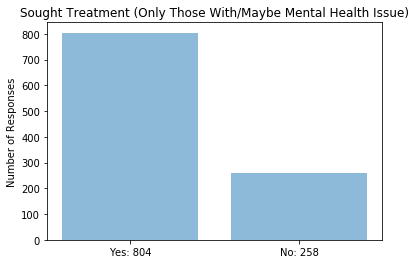

{0, 1}

In [93]:
response = 'Have you ever sought treatment for a mental health issue from a mental health professional?'

options = ("Yes: 804", "No: 258")
y_pos = np.arange(len(options))
ID = clean[response]

numYes = list(ID).count(1)
numNo = list(ID).count(0)

performance = [numYes, numNo]
print performance
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, options)
plt.ylabel('Number of Responses')
plt.title('Sought Treatment (Only Those With/Maybe Mental Health Issue)')
plt.show()


responses = set()
for r in data[response]:
    if r not in responses:
        responses.add(r)
        
responses





[776, 221]


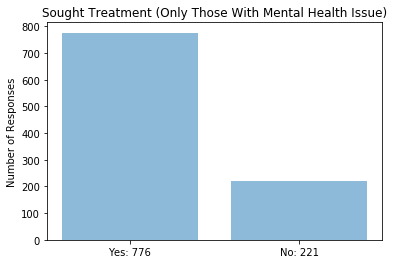

{0, 1}

In [92]:
response = 'Have you ever sought treatment for a mental health issue from a mental health professional?'

options = ("Yes: 776", "No: 221")
y_pos = np.arange(len(options))
ID = clean2[response]

numYes = list(ID).count(1)
numNo = list(ID).count(0)

performance = [numYes, numNo]
print performance
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, options)
plt.ylabel('Number of Responses')
plt.title('Sought Treatment (Only Those With Mental Health Issue)')
plt.show()


responses = set()
for r in data[response]:
    if r not in responses:
        responses.add(r)
        
responses


# clean = clean2



TALK ABOUT: 

Sparse:
'Do you have medical coverage (private insurance or state-provided) which includes treatment of Â mental health issues?',
'Do you know local or online resources to seek help for a mental health disorder?',
'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
'Do you believe your productivity is ever affected by a mental health issue?',
'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',

# #Begin Forward model selection

In [84]:
def evaluate(preds,actual):
    correct = 0.0
    for i in range(0,len(actual)):
        if preds[i] == actual[i]:
            correct += 1
    
    return correct/len(preds)

In [85]:
response = 'Have you ever sought treatment for a mental health issue from a mental health professional?'

In [86]:
warnings.filterwarnings("ignore")
x_cols = [col for col in clean.columns if col not in [response]]
curCols = []
for i in range (10):
    
    train_folds = []
    validation_folds = []
    kf = KFold(n_splits=10, shuffle=True)
    
    accs = dict()
    for train_index, validation_index in kf.split(clean):
        train = clean.iloc[train_index]
        #print train['Have you ever sought treatment for a mental health issue from a mental health professional?']
        validation = clean.iloc[validation_index]

        train_y = list(train[response])
        validation_y = list(validation[response])
    
        for x_col in x_cols:
            if x_col not in curCols:
                trainX = train[curCols + [x_col]]
                trainX = sm.add_constant(trainX, has_constant='add')

                model = sm.Logit(train_y,trainX)
                result_logm = model.fit(method='bfgs',disp=False)

                validationX = validation[curCols + [x_col]]
                validationX = sm.add_constant(validationX,has_constant='add')

                y_probs = result_logm.predict(validationX)
                y_pred = [int(prob > 0.5) for prob in y_probs]
                
                if x_col not in accs:
                    accs[x_col] = [evaluate(y_pred,validation_y)]
                else:
                    accs[x_col].append(evaluate(y_pred,validation_y))
        
    
    accs_avg = []
    for x_col in accs:
        avg = np.mean(accs[x_col])
        accs_avg.append((x_col,avg))
                #accs.append((x_col, evaluate(y_pred,y)))

    accs_sorted = sorted(accs_avg, key=lambda x: x[1], reverse=True)
    print (accs_sorted[0][1])
#     print max([acc for (name,acc) in accs])
    curCols.append(accs_sorted[0][0])

0.822024334333
0.831502380533
0.832295891377
0.834314935637
0.834288485276
0.837145124317
0.838855581026
0.838026803033
0.84005466408
0.840001763357


In [87]:
trainX = clean[curCols]
trainY = clean[response]

trainX = sm.add_constant(trainX)

model = sm.Logit(trainY,trainX)
result_logm = model.fit(method='bfgs',disp=False)

y_probs = result_logm.predict(trainX)
y_pred = [int(prob > 0.5) for prob in y_probs]
print("Accuracy Final Model:",evaluate(y_pred,trainY))

result_logm.summary()

('Accuracy Final Model:', 0.8389830508474576)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                Logit Regression Results                                                               
=======================================================================================================================================================
Dep. Variable:     Have you ever sought treatment for a mental health issue from a mental health professional?   No. Observations:                 1062
Model:                                                                                                   Logit   Df Residuals:                     1051
Method:                                                                                                    MLE   Df Model:                           10
Date:                                                                                         Sun, 03 Dec 2017   Pseudo R-squ.:                  0.2780
Time:                                                                                                 17:05:19   Log-Likelihood:                -425.16
converged:                                                                                               False   LL-Null:                       -588.82
                                                                                                                 LLR p-value:                 2.561e-64
=========================================================================================================================================================================================================
                                                                                                                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                     0.7536      0.275      2.743      0.006         0.215     1.292
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?_Not applicable to me    -2.1659      0.193    -11.232      0.000        -2.544    -1.788
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Often                1.3041      0.202      6.459      0.000         0.908     1.700
How willing would you be to share with friends and family that you have a mental illness?_Neutral                                        -0.7273      0.270     -2.695      0.007        -1.256    -0.198
Do you have previous employers?                                                                                                           1.1282      0.285      3.963      0.000         0.570     1.686
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?_Rarely              -0.4338      0.344     -1.260      0.208        -1.109     0.241
Were you aware of the options for mental health care provided by your previous employers?_N/A (not currently aware)                      -0.7554      0.188     -4.028      0.000        -1.123    -0.388
What is your gender?_female                                                                                                               0.5496      0.425      1.294      0.196        -0.283     1.382
Do you feel that your employer takes mental health as seriously as physical health?_No                                                   -0.1891      0.223     -0.849      0.396        -0.625     0.247
Do you think that discussing a mental health disorder with your employer would have negative consequences?_Yes                            0.1713      0.259     